In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Practice 4_data1.csv')
display(df.head())

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


In [159]:
df = df[df.Date != '10-Jun-17']
display(df.head())

,Date,Time,lights,s2
695,11-Jun-17,0:00:00,0,2
696,11-Jun-17,0:01:00,0,6
697,11-Jun-17,0:02:00,0,11
698,11-Jun-17,0:03:00,0,7
699,11-Jun-17,0:04:00,0,20


In [3]:
df_day1 = df.loc[df['Date'] == '11-Jun-17']
df_day1.head()
df_day2 = df.loc[df['Date'] == '12-Jun-17']
df_day2.head()

,Date,Time,lights,s2
2135,12-Jun-17,0:00:00,0,11
2136,12-Jun-17,0:01:00,0,0
2137,12-Jun-17,0:02:00,0,2
2138,12-Jun-17,0:03:00,0,0
2139,12-Jun-17,0:04:00,0,11


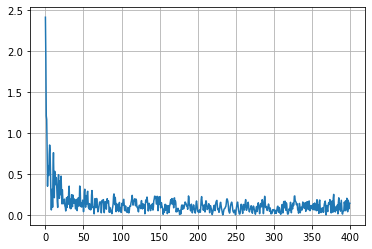

In [4]:
from scipy.fft import fft
# Number of sample points
N = 1440
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N)
#y = np.sin(50.0 * 2.0 * np.pi * x)
yf = fft(df_day1.s2)
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]))
plt.grid()
plt.show()

In [5]:
from scipy.optimize import curve_fit

In [6]:
def model_f(x,a,b,c):
    return a*(x-b)**2+c

In [7]:
fourday = 1440 * 4
popt, pcov = curve_fit(model_f, df.index[:fourday], df.s2[:fourday], p0=[3,2,-16])

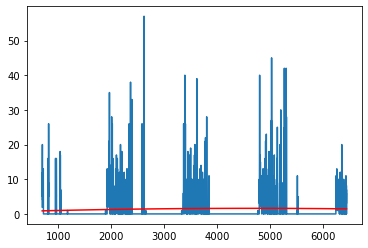

In [8]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(df.index[:fourday]), max(df.index[:fourday]), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
plt.plot(df.index[:fourday], df.s2[:fourday],)
plt.plot(x_model, y_model, color='r')
plt.show()

In [9]:
fourday = 1440 * 4
popt, pcov = curve_fit(model_f, df_day1.index, df_day1.s2, p0=[3,2,-16])

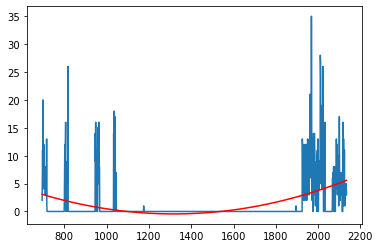

In [10]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(df_day1.index), max(df_day1.index), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
plt.plot(df_day1.index, df_day1.s2)
plt.plot(x_model, y_model, color='r')
plt.show()

In [11]:
print(y_model)

[ 3.06686670e+00  2.90514774e+00  2.74724771e+00  2.59316661e+00
  2.44290442e+00  2.29646116e+00  2.15383682e+00  2.01503141e+00
  1.88004492e+00  1.74887735e+00  1.62152871e+00  1.49799899e+00
  1.37828819e+00  1.26239632e+00  1.15032336e+00  1.04206934e+00
  9.37634232e-01  8.37018051e-01  7.40220793e-01  6.47242459e-01
  5.58083048e-01  4.72742560e-01  3.91220995e-01  3.13518354e-01
  2.39634635e-01  1.69569841e-01  1.03323969e-01  4.08970209e-02
 -1.77110041e-02 -7.25001058e-02 -1.23470284e-01 -1.70621539e-01
 -2.13953871e-01 -2.53467280e-01 -2.89161765e-01 -3.21037327e-01
 -3.49093966e-01 -3.73331681e-01 -3.93750473e-01 -4.10350342e-01
 -4.23131288e-01 -4.32093310e-01 -4.37236409e-01 -4.38560585e-01
 -4.36065837e-01 -4.29752166e-01 -4.19619572e-01 -4.05668055e-01
 -3.87897614e-01 -3.66308250e-01 -3.40899963e-01 -3.11672752e-01
 -2.78626618e-01 -2.41761561e-01 -2.01077581e-01 -1.56574677e-01
 -1.08252850e-01 -5.61121000e-02 -1.52426445e-04  5.96261704e-02
  1.23223690e-01  1.90640

In [12]:
len(df_day1.s2)/2

720.0

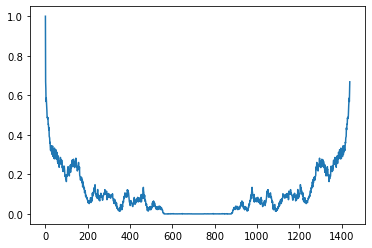

<ipython-input-13-ee687d8b78ca>:17: RuntimeWarning: divide by zero encountered in longlong_scalars
  Ltrunk=df_day1.s2[0:(len(df_day1.s2)//multipleofperiod)*multipleofperiod]


ValueError: Invalid number of FFT data points (0) specified.

In [13]:
fft = np.fft.rfft(df_day1.s2, norm="ortho")

def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('first.jpg')
plt.show()


# let's get a max, assuming a least 4 periods...
multipleofperiod=np.argmax(selfconvol[1:int(len(df_day1.s2)/2)])
Ltrunk=df_day1.s2[0:(len(df_day1.s2)//multipleofperiod)*multipleofperiod]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:int(len(df_day1.s2)/2)])
fmin=np.min(selfconvol[1:int(len(df_day1.s2)/2)])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.7*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

xstartmin=xstartmax
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

period=np.argmax(selfconvol[xstartmax:xstartmin])+xstartmax

print("The period is ",period)

In [14]:
print(selfconvol)

[1.         0.66835025 0.6346952  ... 0.56878532 0.6346952  0.66835025]


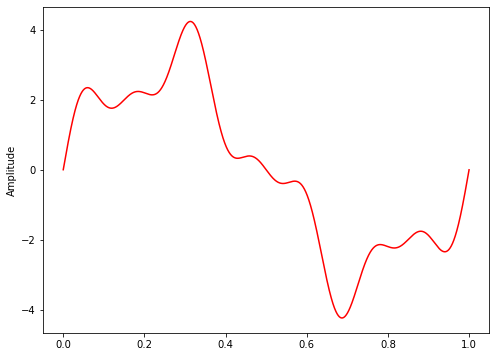

In [44]:
# sampling rate
sr = len(df.index)
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


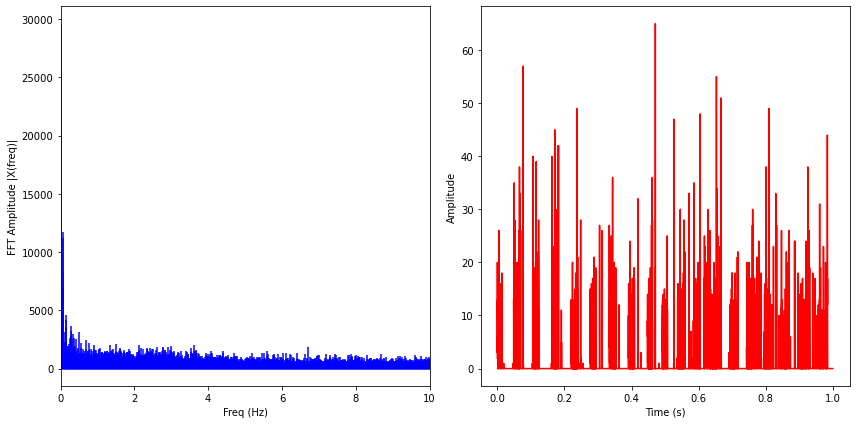

In [24]:
from scipy.fftpack import fft, ifft

X = fft(df.s2)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

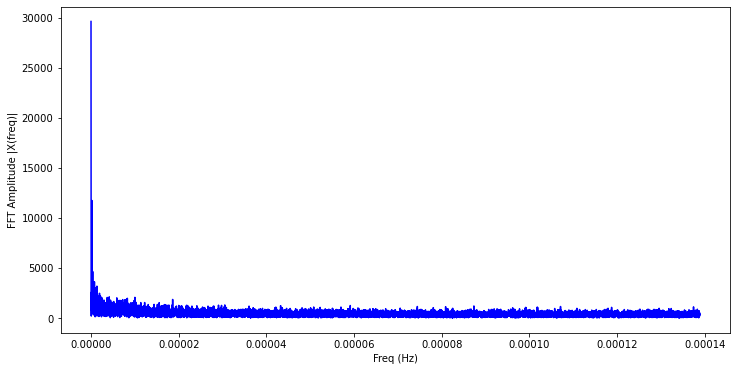

In [25]:
X = fft(df['s2'])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

<ipython-input-43-db8fc4c92802>:2: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60)


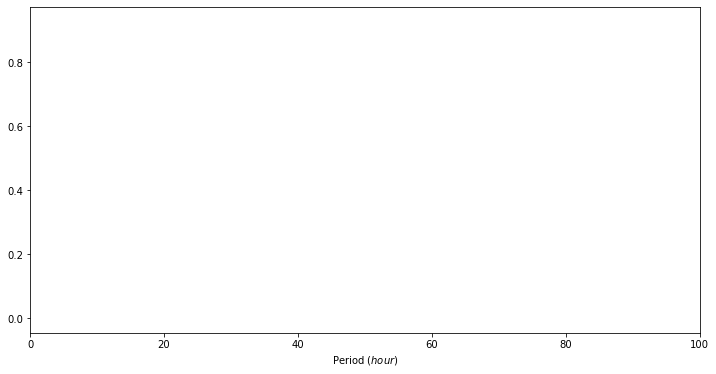

In [43]:
# convert frequency to hour
t_h = 1/f_oneside / (60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
#plt.xticks([12, 24, 84, 168])
plt.xlim(0, 100)
plt.xlabel('Period ($hour$)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


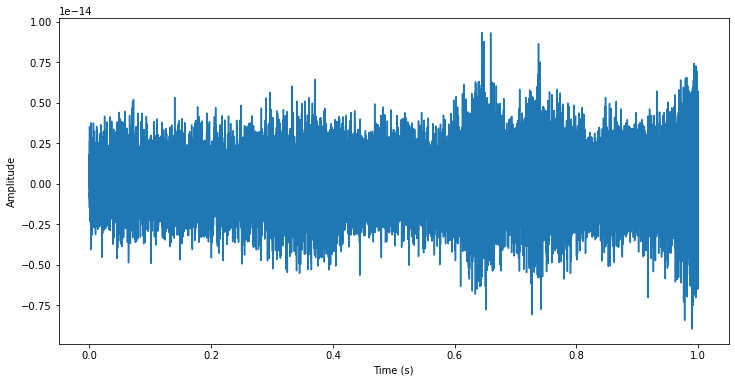

<ipython-input-36-62f4ed6c5715>:29: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


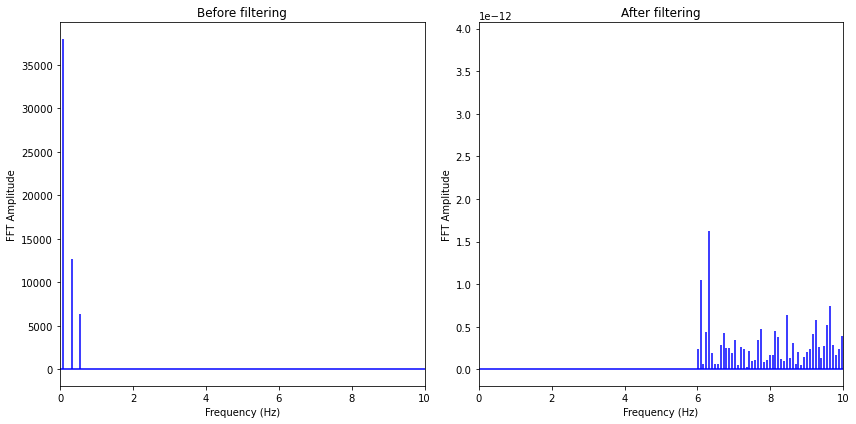

In [36]:
from scipy.fftpack import fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

t_h = 1/f_oneside / (60 * 60)

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

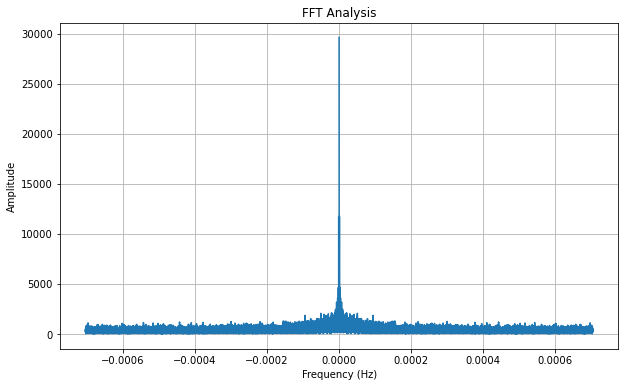

The spider is active at hour: 7


In [48]:

# Convert the 'time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])
# Calculate the time difference in minutes
df['time_diff'] = (df['Time'] - df['Time'].min()).dt.total_seconds() / 60
# Perform FFT analysis
fft_result = np.fft.fft(df.s2)
fft_freq = np.fft.fftfreq(len(df), d=df['time_diff'].mean())
# Find the index of the maximum FFT value (excluding the DC component)
max_index = np.argmax(np.abs(fft_result[1:])) + 1
# Find the corresponding frequency (in Hz)
peak_freq = fft_freq[max_index]
# Calculate the corresponding period (in minutes)
peak_period = 1 / peak_freq
# Calculate the corresponding hour
peak_hour = (df['Time'].min() + pd.Timedelta(minutes=peak_period)).hour
# Plot the FFT analysis result
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Analysis')
plt.grid(True)
plt.show()
# Display the active hour
print('The spider is active at hour:', peak_hour)

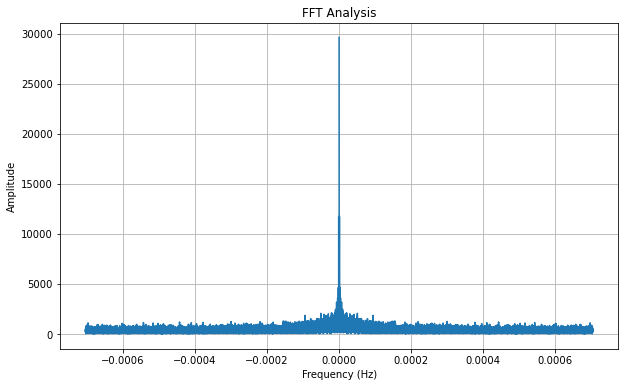

The spider is active at hour: 11
The spider is active at hour: 16
The spider is active at hour: 7


In [89]:
# Convert the 'time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])
# Calculate the time difference in minutes
df['time_diff'] = (df['Time'] - df['Time'].min()).dt.total_seconds() / 60
# Perform FFT analysis
fft_result = np.fft.fft(df.s2)
fft_freq = np.fft.fftfreq(len(df), d=df['time_diff'].mean())
# Find the indices of the maximum FFT values (excluding the DC component)
max_indices = np.argsort(np.abs(fft_result[1:]))[-3:] + 1
# Find the corresponding frequencies (in Hz)
peak_freqs = fft_freq[max_indices]
# Calculate the corresponding periods (in minutes)
peak_periods = 1 / peak_freqs
# Calculate the corresponding hours
peak_hours = [(df['Time'].min() + pd.Timedelta(minutes=period)).hour for period in peak_periods]
# Plot the FFT analysis result
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Analysis')
plt.grid(True)
plt.show()
# Display the active periods every 24 hours
for hour in peak_hours:
    print('The spider is active at hour:', hour)

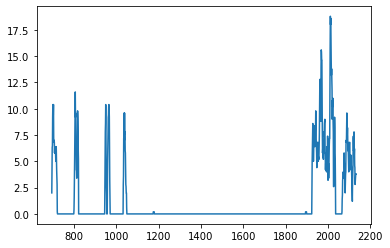

In [117]:
s2_rolling5 = df.s2.rolling(5, min_periods=1).mean()
plt.plot(df.index, s2_rolling5)

In [ ]:
df_test = df
df_test['rolling'] = 

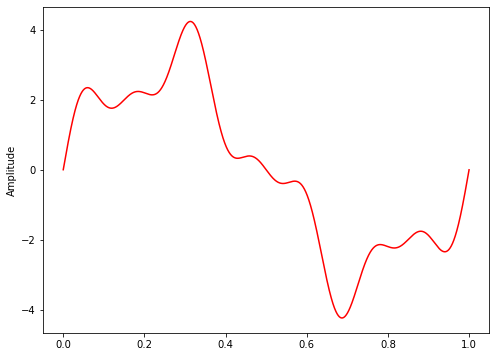

In [63]:
# sampling rate
sr = len(s2_rolling5.index)
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [85]:
print(s2_rolling5.astype(int))
s2_rolling5 = s2_rolling5.astype(int)

695      2
696      4
697      6
698      6
699      9
        ..
25999    0
26000    0
26001    0
26002    0
26003    0
Name: s2, Length: 25309, dtype: int32


# Cosinor

In [175]:
s2_rolling5 = df.s2.rolling(360, min_periods=1).mean()
print(len(s2_rolling5.index))
print(len(df.index))

25309
25309


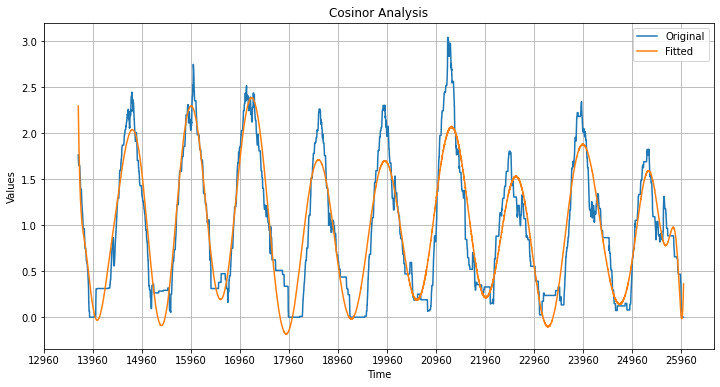

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Convert the 'time' column to datetime format
#df['time'] = pd.to_datetime(df['time'])

# Extract the time and value columns
time = s2_rolling5.index[(1440 * 9):]
values = s2_rolling5[(1440 * 9):]

# Define the number of components for the cosinor analysis
num_components = 1000  # Increase this number to add more fluctuations
# Create the design matrix for the cosinor analysis
t = np.linspace(0, 2 * np.pi, len(time))
exog = []
frequencies = []
for i in range(num_components):
    freq = (i + 1) * (2 * np.pi / 1440)  # Adjust the frequency based on the desired period
    exog.append(np.cos(freq * t))
    exog.append(np.sin(freq * t))
    frequencies.append(freq)
exog = np.column_stack(exog)

# Add a constant column to the design matrix
exog = sm.add_constant(exog)

# Perform the cosinor analysis
model = sm.OLS(values, exog)
result = model.fit()

# Extract the fitted values from the cosinor analysis
fitted_values = result.fittedvalues
periods = [2 * np.pi / freq for freq in frequencies]

# Plot the original time series and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Original')
plt.plot(time, fitted_values, label='Fitted')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Cosinor Analysis')
plt.legend()
plt.xticks(range(1440*9, 26000, 1000))
plt.grid(True)
plt.show()

# Print the cosinor analysis results
#print(result.summary())

#print("Periods of the waves:")
#for i, period in enumerate(periods):
#    print(f"Wave {i+1}: {period:.2f} minutes")

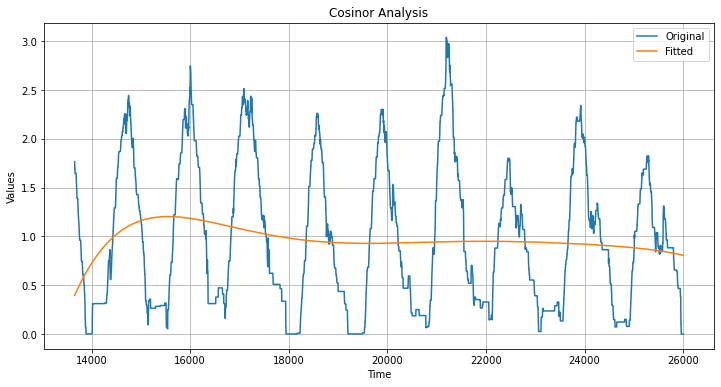

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import argrelextrema


# Convert the 'time' column to datetime format
#df['time'] = pd.to_datetime(df['time'])

# Extract the time and value columns
time = s2_rolling5.index[(1440 * 9):]
values = s2_rolling5[(1440 * 9):]

# Define the number of components for the cosinor analysis
num_components = 5  # Increase this number to add more fluctuations
# Create the design matrix for the cosinor analysis
t = np.linspace(0, 2 * np.pi, len(time))
exog = []
frequencies = []
for i in range(num_components):
    freq = (i + 1) * (2 * np.pi / 1440)  # Adjust the frequency based on the desired period
    exog.append(np.cos(freq * t))
    exog.append(np.sin(freq * t))
    frequencies.append(freq)
exog = np.column_stack(exog)
# Add a constant column to the design matrix
exog = sm.add_constant(exog)
# Perform the cosinor analysis
model = sm.OLS(values, exog)
result = model.fit()
# Extract the fitted values from the cosinor analysis
fitted_values = result.fittedvalues
# Calculate the periods based on the frequencies
periods = [2 * np.pi / freq for freq in frequencies]
# Find the peaks and troughs in the fitted values
peaks = argrelextrema(fitted_values.to_numpy(), np.greater)[0]
troughs = argrelextrema(fitted_values.to_numpy(), np.less)[0]
# Reset the index of the time series
#time = time.reset_index(drop=True)
# Plot the original time series and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Original')
plt.plot(time, fitted_values, label='Fitted')
#plt.scatter(time.iloc[peaks], fitted_values.iloc[peaks], c='r', marker='o', label='Peaks')
#plt.scatter(time.iloc[troughs], fitted_values.iloc[troughs], c='g', marker='o', label='Troughs')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Cosinor Analysis')
plt.legend()
plt.grid(True)
plt.show()
# Print the cosinor analysis results, the periods, and the peaks/troughs
#print(result.summary())
#print("Periods of the waves:")
toppeaks = peaks[-18:]

In [199]:
for peak in toppeaks:
    print(time[peak])
print("Troughs:")
#for trough in troughs:
#    print(time[trough])

22930
22933
22949
22958
22994
23008
23018
23066
23112
23147
23221
23241
23273
23307
23395
23437
23536
23652
Troughs:


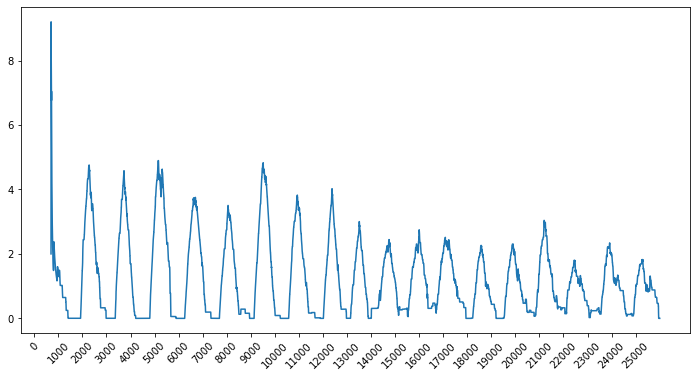

In [209]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, s2_rolling5)
plt.xticks(range(0, 26000, 1000), rotation = 45)
plt.show()

In [224]:
fft = np.fft.rfft(s2_rolling5, norm="ortho")

def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")

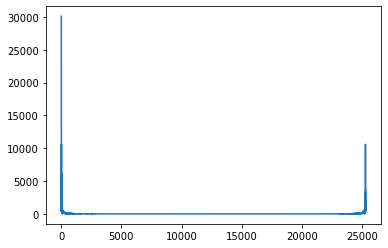

In [216]:
plt.plot(np.abs(np.fft.fft(s2_rolling5)))

In [206]:
from scipy.signal import find_peaks
min_idx = find_peaks(s2_rolling5)
print(min_idx)

(array([    4,     8,    17,    21,   111,   116,   122,   255,   271,
         340,   342,   345,   347,   350,  1581,  1602,  1607,  1629,
        1646,  1660,  1666,  1672,  1677,  1715,  1897,  1928,  3031,
        3034,  3041,  3057,  3059,  3069,  3073,  3083,  3089,  3092,
        3114,  3146,  3158,  4459,  4492,  4494,  4502,  4504,  4509,
        4515,  4546,  4549,  4552,  4554,  4557,  4559,  4580,  4587,
        4591,  4614,  4618,  4622,  4842,  5917,  5920,  5926,  5930,
        5949,  5954,  5964,  5967,  5970,  5976,  5985,  5992,  5995,
        6000,  6003,  6016,  6020,  6023,  6026,  6035,  6038,  6047,
        6059,  6061,  6063,  6240,  6281,  6283,  6285,  6535,  7360,
        7368,  7371,  7373,  7388,  7393,  7396,  7398,  7403,  7406,
        7423,  7434,  7436,  7446,  7449,  7712,  7714,  7717,  7981,
        8802,  8805,  8808,  8815,  8821,  8840,  8846,  8849,  8852,
        8855,  8860,  8865,  8881,  8885,  8893,  8928,  8932,  8945,
        8952,  8956